In [1]:
### Implementation of k-means algorithm
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy.random import default_rng
rng = default_rng(535)

In [2]:
### This optimizes over the choices of the vectors mu_i
def opt_reps(X, k, assign):
    ### X is the data set, k=number clusters, assign = current cluster assignment
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

In [3]:
### This optimizes over the choices of the clusters C_j
def opt_clust(X, k, reps):
    ### X is the data set, k=number clusters, reps = current mu choices
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign


In [4]:
X = np.array([[1., 0.],[-2., 0.],[-2.,1.],[1.,-3.],[-10.,10.],[2.,-2.],[-3.,1.],[3.,-1.]])

In [5]:
def mmids_kmeans(X, k, maxiter=10):
    (n, d) = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign)
        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps)
    return assign


88.00000000000001
12.500000000000004
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334


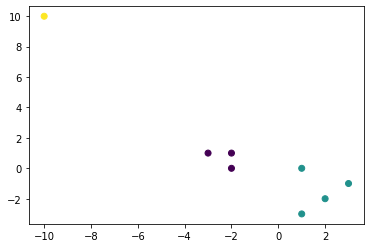

In [31]:
X = np.array([[1., 0.],[-2., 0.],[-2.,1.],[1.,-3.],[-10.,10.],[2.,-2.],[-3.,1.],[3.,-1.]])
assign = mmids_kmeans(X,3)
plt.scatter(X[:,0],X[:,1], c = assign)
plt.show()

In [7]:
opt_reps(X, 3, assign)


array([[ -2.33333333,   0.66666667],
       [  1.75      ,  -1.5       ],
       [-10.        ,  10.        ]])

In [8]:
import pandas as pd

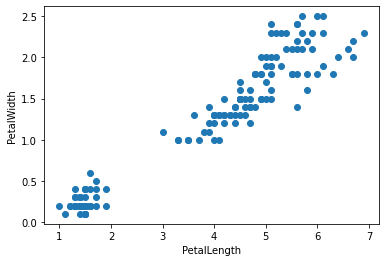

In [9]:
df = pd.read_csv("./datasets/iris-measurements.csv")
X = df[['PetalLengthCm', 'PetalWidthCm', 
        'SepalLengthCm', 'SepalWidthCm']].to_numpy()
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()


569.0432502813364
108.45132116347064
88.92035772737768
85.04157943238867
84.10217888865151
83.13638186876976
81.83900206772623
80.89577600000003
79.96297983461305
79.43376414532673


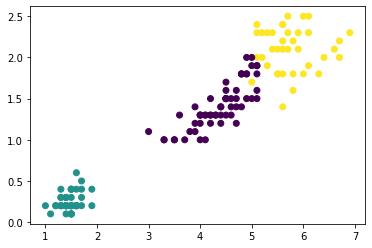

In [10]:
assign = mmids_kmeans(X, 3)
plt.scatter(X[:,0], X[:,1], c=assign)
plt.show()


In [11]:
df_truth = pd.read_csv("./datasets/iris-species.csv")
df_truth.head()

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa


In [12]:
species = df_truth['Species']
species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

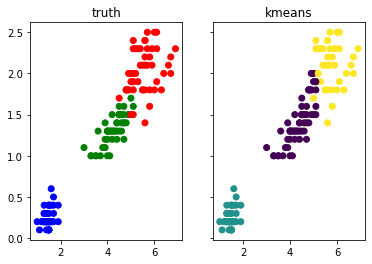

In [13]:
species2color = {'Iris-setosa': 'b', 'Iris-versicolor': 'g', 'Iris-virginica': 'r'}
truth = species.replace(species2color)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(X[:,0], X[:,1], c=truth)
ax1.set_title('truth')
ax2.scatter(X[:,0], X[:,1], c=assign)
ax2.set_title('kmeans')
plt.show()


### What happens in high-dimensions?
Below ```one_cluster``` generates a $n$ inependent Gaussian random vectors $\mathbf{Z}_i\in \mathbb{R}^d$ for $i=1,\dotsm,d$ where
$$
\mathbb{E}[Z_{il}] = \begin{cases} w &: i=1\\
0&: \text{else}
\end{cases}
$$
Using vectors we can say
$$
\mathbb{E}[\mathbf{Z}_i] = w\mathbf{e}_1
$$
where $\mathbf{e}_j$ is the $j^\text{th}$ standard basis vector.

```two_cluster``` generates two datasets using ```one_cluster```, one with mean $w\mathbf{e}_1$ and the other with mean $-w\mathbf{e}_1$. 

In [14]:
def one_cluster(d, n, w):
    X = np.stack([np.concatenate(([w], np.zeros(d-1))) + rng.normal(0,1,d) for _ in range(n)])
    return X

def two_clusters(d, n, w):
    X1 = one_cluster(d, n, -w)
    X2 = one_cluster(d, n, w)
    return X1, X2

Below are $n=100$ samples in $\mathbb{R}^2$ with $w = 3$.

In [15]:
d, n, w = 2, 100, 3.
X1, X2 = two_clusters(d, n, w)
X = np.concatenate((X1, X2), axis=0)

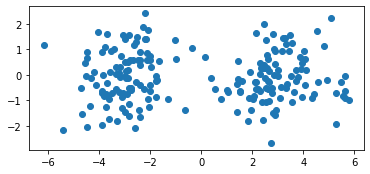

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.scatter(X[:,0], X[:,1])
plt.show()

In [17]:
assign = mmids_kmeans(X, 2)

1990.7764301698994
439.3407184927022
439.1505261946975
439.1505261946975
439.1505261946975
439.1505261946975
439.1505261946975
439.1505261946975
439.1505261946975
439.1505261946975


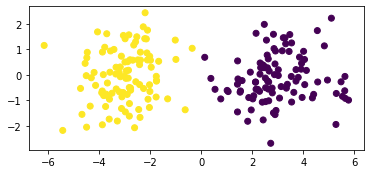

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.scatter(X[:,0], X[:,1], c=assign)
plt.show()

Let's go up to $d = 1,000$ and see what happens.

In [19]:
d, n, w = 1000, 100, 3.
X1, X2 = two_clusters(d, n, w)
X = np.concatenate((X1, X2), axis=0)

Here the first two coordinates are still pretty well-separated.

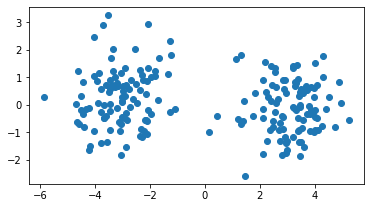

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.scatter(X[:,0], X[:,1])
plt.show()

This shouldn't be *too* surprising. The first coordinate of each $\mathbf{Z}_i$ has mean either $w$ or $-w$ which are distance 6 appart ($w = 3$).

This vanishes when we look at any other dimensions. Here is $Z_{i,18}$ plotted against $Z_{i,216}$. 

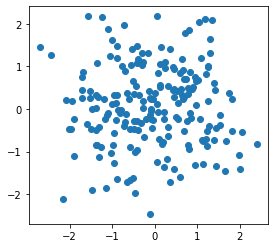

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.scatter(X[:,17], X[:,215])
plt.show()

Let's see how $k$-means clustering works:

In [22]:
assign = mmids_kmeans(X, 2)

200835.3225527596
200835.3225527596
200835.3225527596
200835.3225527596
200835.3225527596
200835.3225527596
200835.3225527596
200835.3225527596
200835.3225527596
200835.3225527596


It *seems* to stabilize? So maybe the clustering is good?

Let's look at the first two coordinates with the color-coding from $k$-means:

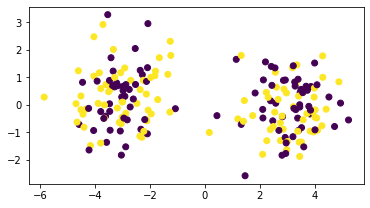

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.scatter(X[:,0], X[:,1], c=assign)
plt.show()

In short the issue is that the following:
$$
\mathbf{Z} \sim \mathcal{N}\left(w\mathbf{e}_1, I_{d\times d} \right)
$$
is a spherical Gaussian in $\mathbb{R}^d$ with mean vector $w \mathbf{e}_1$. 

Then for $w$ small and $d$ large
$$
\mathbf{Z} \approx \sqrt{d} \boldsymbol{\Theta}
$$
where $\boldsymbol\Theta$ is a uniformly chosen point on the $d-1$-dimensional sphere in $\mathbb{R}^{d}$.

So the $d=1,000$ dimensional data points are very close to i.i.d. random variables.


Below `highdim_2clusters` shows what happens visualy. 

It first generates data `X1` and `X2` using `two_clusters` from above. 

It then plots the histogram of distances between all possible pairs of data points within `X1`
and the histogram of pairwise distances between all possible pairs of data points with one in `X1` and the other in `X2`.

In [24]:
def highdim_2clusters(d, n, w):
    # generate datasets
    X1, X2 = two_clusters(d, n, w)
    
    # within-cluster distances for X1
    intra = np.stack([LA.norm(X1[i,:] - X1[j,:]) for i in range(n) for j in range(n) if j>i])
    plt.hist(intra, density=True, label='within-cluster')
    plt.title(f'dim={d}')
 
    # between-cluster distances
    inter = np.stack([LA.norm(X1[i,:] - X2[j,:]) for i in range(n) for j in range(n)])
    plt.hist(inter, density=True, alpha=0.75, label='between-cluster')

    plt.legend(loc='upper right')
    plt.title(f'dim={d}')

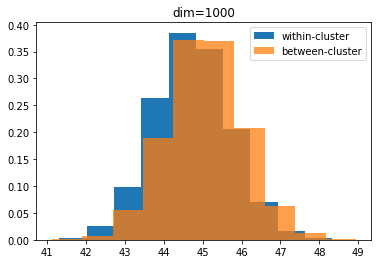

In [25]:
highdim_2clusters(1000, 100, 3)

#### Heuristic for statement above about Gaussians

Recall Chebyshev's and Markov's inequalities:
* (Markov) Let $X$ be a non-negative random variable. Then for any $t\ge 0$
$$
\mathbb{P}(X\ge t) \le \frac{\mathbb{E}[X]}{t};
$$

* (Chebyshev's inequality) Let $X$ be any random variable with mean $\mu = \mathbb{E}[X]$. Then for any $t \ge 0$
$$
\mathbb{P}(X\ge \mu + t) \le \frac{\operatorname{Var}(X)}{t^2},\\
\mathbb{P}(X\le \mu - t) \le \frac{\operatorname{Var}(X)}{t^2},\\
\mathbb{P}(|X-\mu|\ge  t) \le \frac{\operatorname{Var}(X)}{t^2}.
$$



Now $\mathbf{Z}$ is a spherical Gaussian in $\mathbb{R}^d$ with mean $0$ and variance 1. That means 
$$
\mathbf{Z} = \begin{bmatrix} Z_1\\Z_2\\\vdots\\Z_d
\end{bmatrix},\qquad  (Z_i; i=1,\dotsm, d)\overset{\text{i.i.d}}{\sim} \mathcal{N}(0,1).
$$

**Fact:** If $\mathbf{Z}$ is a spherical Gaussian in $\mathbb{R}^d$ with mean $0$ and variance $1$, and $U\in \mathbb{R}^{d\times d}$ is an orthogonal matrix:
$$
U U^T = U^T U = I_{d\times d},
$$
then $U\mathbf{Z} \overset{d}{=} \mathbf{Z}$.

In words: The distribution of $\mathbf{Z}$ is invariant under rotations and reflections in $\mathbb{R}^d$.

**Lemma** Let $\mathbf{Z}$ be a spherical Gaussian in $\mathbb{R}^d$ with mean $0$ and variance $1$. Then
$$
\mathbb{P}\left( \left|\|\mathbf{Z}\|^2 - d\right|\ge td \right)\le \frac{2}{d t^2}.
$$

*Proof:* 
First
$$
\|\mathbf{Z}\|^2 = \sum_{i=1}^d Z_i^2
$$ is the sum of indepenent and identically distributed random variables.


Second
$$
\mathbb{E}\left[\|\mathbf{Z}\|^2\right] = \sum_{i=1}^d \mathbb{E}\left[Z_i^2\right]  = d\mathbb{E}\left[Z_1^2\right] = d,
$$
since $\operatorname{Var}(Z_1) = \mathbb{E}[Z_1^2] = 1.$

Third, using independence,
$$
\operatorname{Var}\left[\|\mathbf{Z}\|^2\right] = \sum_{i=1}^d \operatorname{Var}({Z}^2_i) = d \operatorname{Var}(Z_1^2).
$$
Now
$$
\operatorname{Var}(X) = \mathbb{E}[X^2]- \mathbb{E}[X]^2,
$$
so 
$$
\operatorname{Var}(Z_1^2) = \mathbb{E}[Z_1^4]-\mathbb{E}[Z_1^2]^2 = 3 -1^2 = 2.
$$

Now we can apply Chebyshev's inequality:
$$
\mathbb{P}\Bigg(\bigg|\|\mathbf{Z}\|^2 - d\bigg| \ge t d \Bigg)\le \frac{\operatorname{Var}(\|\mathbf{Z}\|^2)}{(td)^2} = \frac{2d}{d^2 t^2} = \frac{2}{dt^2}.\square
$$


For any $a>0$ and $\varepsilon\in(0,1)$ we can write
$$
|x-a|< \varepsilon a
$$
as
$$
-\varepsilon a < x-a< \varepsilon a
$$
which is
$$
x\in \Big((1-\varepsilon)a, (1+\varepsilon)a \Big).
$$

So the above lemma implies
$$
\mathbb{P}\Bigg(\|\mathbf{Z}\| \in \Big( \sqrt{(1-\varepsilon)d}, \sqrt{(1+\varepsilon)d}\Big) \Bigg) \le \frac{2}{d\varepsilon^2}.
$$

Let's do some numerical computations:

In [26]:
d,n,w = 10000,1000,0
Z = one_cluster(d,n,w)
eps = .05

In [27]:
Norms = [LA.norm(Z[i,:]) for i in range(n)]

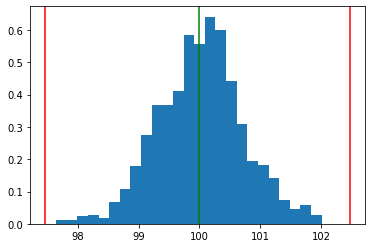

In [28]:
plt.axvline(x = np.sqrt(d), color = 'g', label = 'axvline - full height')
plt.axvline(x = np.sqrt((1-eps)*d), color = 'r', label = 'axvline - full height')
plt.axvline(x = np.sqrt((1+eps)*d), color = 'r', label = 'axvline - full height')
plt.hist(Norms, bins = 25, density = True)
plt.show()

The observed proporition of data points $\mathbf{Z}_i$ with $\|\mathbf{Z}\|\notin \Big(\sqrt{(1-\varepsilon)d},\sqrt{(1+\varepsilon)d} \Big)$ for $\varepsilon =$ ``eps`` $ = 0.05$ above.

In [29]:
sum( (z< np.sqrt((1-eps)*d) or z>np.sqrt((1+eps)*d)) for z in Norms)/n

0.0

Below is the bound that the above lemma gives us. 

In [30]:
print(2/(eps**2 * d)) ## x**p is x^p in python.

0.07999999999999999
